<a href="https://colab.research.google.com/github/tanishkthomas/Multi-class-Clasification-on-the-IRIS-Dataset/blob/main/TheSparksFoundation_Task_6_May_21_Batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Classifier**

#### **Importing required Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### **Importing the Dataset from my GitHub Repository**

In [ ]:
url = "https://raw.githubusercontent.com/tanishkthomas/Datasets/main/Iris.csv"
dataset = pd.read_csv(url)
X = dataset.iloc[:, 1:5]  # X is the independent data
Y = dataset.iloc[:, 5]    # Y is the target variable

## **Brief analysis and Data Visualization**

In [ ]:
print("(row, column) = ",dataset.shape)

(row, column) =  (150, 6)


In [ ]:
dataset["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## **Visualising the Probability Distribution Function respective to the dataset**

In [ ]:
sns.FacetGrid(dataset.iloc[:, 1:], hue="Species", size=5).map(sns.distplot, "SepalLengthCm").add_legend()
sns.FacetGrid(dataset.iloc[:, 1:], hue="Species", size=5).map(sns.distplot, "SepalWidthCm").add_legend()
sns.FacetGrid(dataset.iloc[:, 1:], hue="Species", size=5).map(sns.distplot, "PetalLengthCm").add_legend()
sns.FacetGrid(dataset.iloc[:, 1:], hue="Species", size=5).map(sns.distplot, "PetalWidthCm").add_legend()

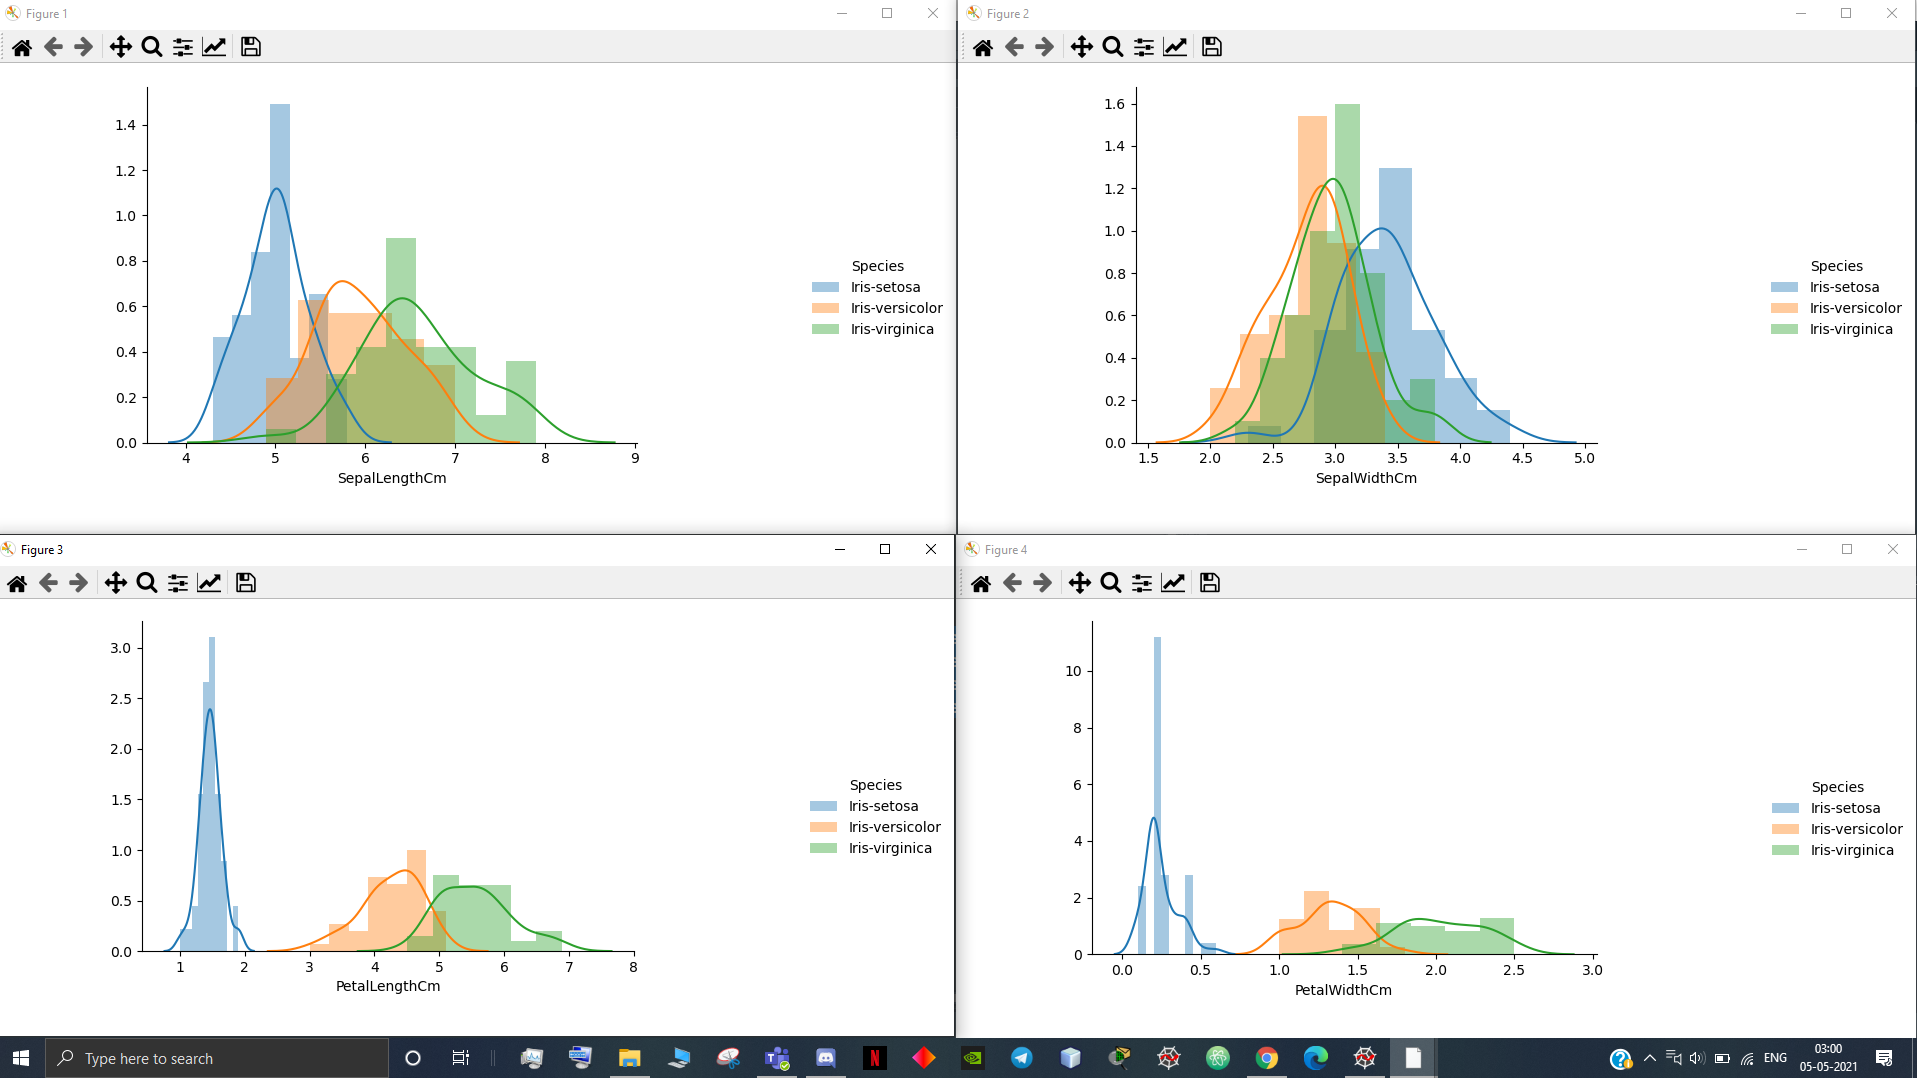

#####**Using Distribution plots we cannot infer much information, but can only separate the species Iris-Setosa**

##### **So, now we use a scatter plot to visually classify the species on the basis of petal length and petal width, since both are a distinguishing factor**

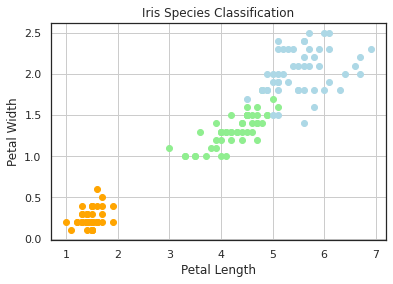

In [ ]:
colours = {'Iris-setosa':'orange', 'Iris-versicolor':'lightgreen', 'Iris-virginica':'lightblue'}
for i in range(len(dataset)):
  plt.scatter(dataset['PetalLengthCm'][i], 
              dataset['PetalWidthCm'][i], 
              color = colours[dataset['Species'][i]]) 

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Species Classification")
plt.grid(True)
plt.show()

### **LabelEncoding & Splitting of data into Train and Test sets**

---

**{0-Iris-setosa; 1-Iris-versicolor; 2-Iris-virginica;}**

In [ ]:
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("X_train - ",X_train.shape, "\nX_test - ",X_test.shape, "\nY_train - ",Y_train.shape, "\nY_test - ",Y_test.shape)

X_train -  (105, 4) 
X_test -  (45, 4) 
Y_train -  (105,) 
Y_test -  (45,)


In [ ]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **Scaling the Data to avoid bias and normalising it to a particular range**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### **Fitting the classifier to the dataset**

In [ ]:
classifier = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, random_state=42)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

### **Predicting the test values**

In [ ]:
Y_pred = classifier.predict(X_test)

### **Confusion Matrix**

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]


### **Getting the number of unique values in the Y_test set, in order to compare it with the Confusion Matrix**

In [ ]:
np.unique(Y_test, return_counts=True)

(array([0, 1, 2]), array([19, 13, 13]))

## **Accuracy = 95.6%**
## **The accuracy can be improved, if a larger dataset is available.**